In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [17]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')


In [18]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


<Axes: xlabel='age', ylabel='income'>

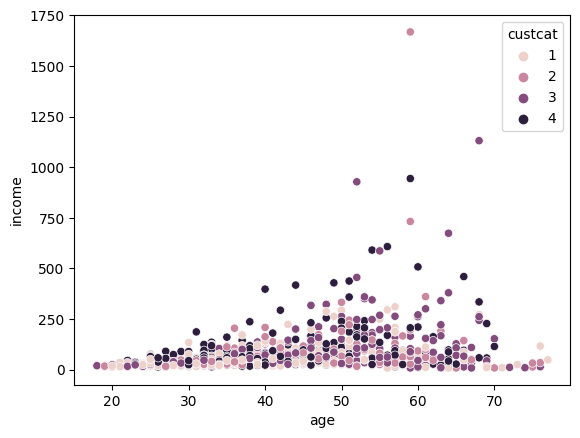

In [19]:
import seaborn as sns
sns.scatterplot(x="age",y="income",data=df,hue="custcat")

In [20]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


array([[<Axes: title={'center': 'income'}>]], dtype=object)

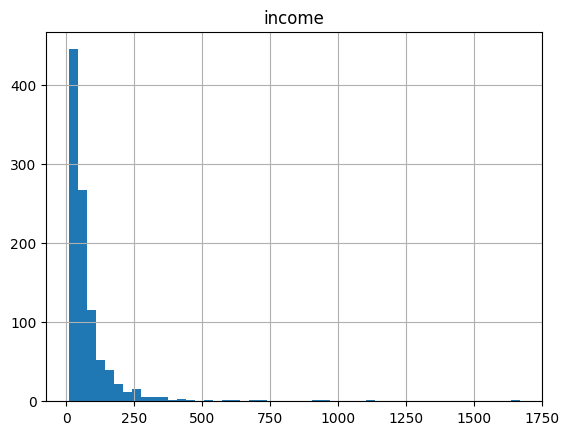

In [22]:
df.hist(column="income",bins=50)

In [29]:
X=df.drop("custcat",axis=1).values # why we change into array to use
y=df["custcat"].values

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test  = train_test_split(X,y ,test_size=0.2,random_state=818)
scale = StandardScaler()
X_train = scale.fit(X_train).transform(X_train)
X_test=scale.transform(X_test)

In [35]:
print(X_train.shape)

(800, 11)


In [36]:
knn_range = []
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  knn_range.append(y_pred)

In [59]:
from sklearn.metrics import accuracy_score ,recall_score
score=[]
for num,i in enumerate(knn_range):
  scores=accuracy_score(y_test[i],y_pred[i])
  score.append(scores)

In [55]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)

[1 3 4 3 4 3 4 2 4 1 2 4 3 3 2 1 3 1 3 2 1 1 3 3 1 1 4 1 2 4 4 1 3 1 3 1 4
 3 4 3 1 3 1 2 4 1 4 2 4 1 3 3 1 4 4 1 1 2 3 1 1 1 4 3 1 1 4 3 1 2 3 1 1 1
 4 3 2 1 1 1 3 4 3 3 1 2 3 1 4 2 4 3 4 4 3 2 4 1 3 3 1 1 4 2 1 1 3 3 4 2 4
 2 3 4 3 3 4 4 3 1 3 1 4 1 1 3 1 3 3 2 3 3 3 1 2 2 1 3 3 3 1 2 3 2 4 1 1 2
 3 3 1 4 4 3 2 1 2 2 4 4 1 1 2 4 4 3 3 3 1 1 3 1 4 1 3 3 2 2 3 3 3 3 4 4 3
 1 3 3 3 2 2 1 1 1 3 4 1 2 1 1]


In [61]:
accuracy = accuracy_score(y_test, y_pred)

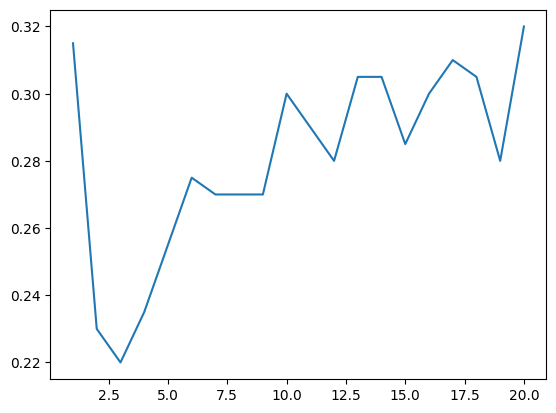

In [68]:
knn_=[i for i in range(1,21)]
plt.plot(knn_,score)

In [63]:
accuracy

0.355